*SIO221a Notes - Alford and Gille*

*Reading:  Bendat and Piersol, Ch. 5.1-5.2, with attention to cross-covariance and cross-spectrum*

Concepts covered: Rotary spectrum, cross-covariance, cross-spectrum, coherence

# Lecture 16

*Recap* 

Last time we looked at frequency-wavenumber spectra in some detail, and
we'll now first turn to rotary spectra, and then turn to a different question to ask how two physical quantities relate to each other, using covariance and coherence.

**Rotary Spectra**

We've discussed spectra for scalar quantities:  temperature, wind speed, or atmospheric pCO$_2$.  And we're learned that the positive and negative parts of the spectrum are the same for real quantities.  

But what happens when we think about a vector quantity such as velocity?  Of course you can treat the $u$ and $v$ components of velocity as separate scalars, but that might fail to capture the complexity of the overall motion.  Rotary spectra provide a way to examine vector motions as a combined quantity.

To start thinking about rotary spectra, let's think about a single frequency.  Imagine that you're sitting on the beach on a summer day.  In the afternoon, as the land warms, wind starts blowing onshore from the ocean.  This is the classic sea breeze.  The wind direction reverses at night, when wind blows from the cold land to the warm ocean.  Our cartoon schematics suggest that this is just an onshore/offshore circulation, but of course we live on a rotating planet, so the sea breeze, like everything else, rotates with the Earth's rotation and so probably traces out an ellipse.  If we had a full anemometer, we would be able to identify this pattern of circulation.  It would be nice to have a way to characterize how and what direction the rotation is for this freqeuncy - and then for all freqeuncies in the spectrum.

Turns out we can do this.  Consider a hypothetical wind that is rotating counterclockwise:
\begin{eqnarray}
u(t) & = & \cos(\omega t)\\
v(t) & = & \sin(\omega t)
\end{eqnarray}

We can form a complex vector 

$$
U(t)  = u(t) +iv(t)
$$ 

which for our simple counterclockwise (CCW) example is just
$$ 
U_{CCW}(t)=e^{i\omega t},
$$
and if we'd chosen the phasing between our sine and cosine above differently, we'd have been able to create a clockwise signal:
$$ 
U(t)_{CW}=e^{-i\omega t},
$$

Now returning to our expression from lecture 7, 
$$
x(t) = \sum_{q=-\infty}^{\infty}\left[\hat{a}_q \exp(i2\pi q f_1 t)\right]
$$
we are reminded that a sine or cosine (a real time series) winds up having Fourier amplitudes at $\pm \omega$ that are complex conjugates of each other.

But now we can see that the Fourier transform of $U_{CCW}$ is a $\delta$ function at $+\omega$, since it represents a phasor on the complex plane moving toward greater values. The transform of $U_{CW}$ appears at $-\omega$. The value of the positive/negative Fourier amplitudes of a rotary variable such as $U$ is now interpreted as "how much of the signal is rotating counterclockwise/clockwise at that frequency?"  

These are the bones of a very useful extension of the spectrum known as the rotary spectrum.  (For more details, you can see Mooers (1970) or Gonella (1970).) To compute it, we simply take a complex time series and compute the spectrum as we would have before, but now we keep both the positive and negative frequencies since they contain independent information from each other.

Let's look at an example from the PAPA record.  Here, recall we saw a strong inertial peak, which in the northern hemisphere should correspond to nearly circular counterclockwise motions.  Let's compute the spectrum and see if they do indeed show up at $-f$ where $f$ is the inertial or Coriolis frequency.

Sample interval is 30 minutes.
record length is 333.3125 days long.
The record has 0 NaNs.


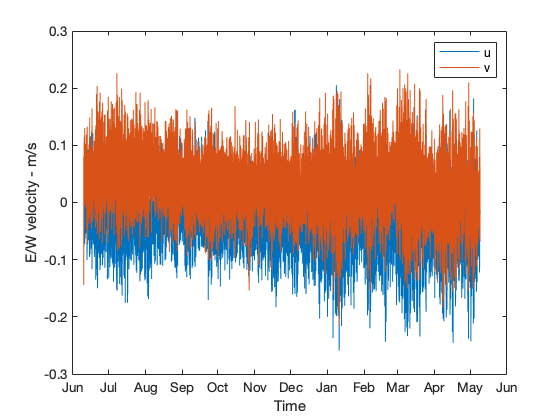

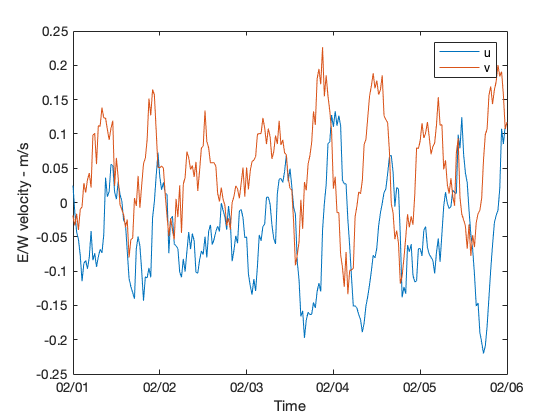

In [1]:
%Let's load in some real data from Alford et al (2012) and have a look.
clear all
cd('/Users/malford/GoogleDrive/Work/Projects/Teaching/sio221a/MHA_2022/')
load('data/Vel_2008-2009.mat')

%Now we will make a complex vector.
it=1:16000;
iz=min(find(Vel.z > 300));
data=Vel.u(iz,it)+i*Vel.v(iz,it);
time=Vel.dtnum(it);
dt=nanmean(diff(time));

disp(['Sample interval is ' num2str(dt*24*60) ' minutes.'])

disp(['record length is ' num2str(nanmax(time) - nanmin(time)) ' days long.'])
%% Check it for nans!
disp(['The record has ' num2str(length(find(isnan(data)))) ' NaNs.'])

figure(1)

plot(time,real(data),time,imag(data))
ylabel('E/W velocity - m/s')
xlabel('Time')
legend('u','v')

datetick

%And let's zoom in:
figure(2)

plot(time,real(data),time,imag(data))
ylabel('E/W velocity - m/s')
xlabel('Time')


xlim(datenum(2009,2,1,0,0,0)+[0 5])
datetick('x','keeplimits')
legend('u','v')



variance =

    0.0070


sum_spec =

    0.0070


ans =

    1.0000

> In matlab.graphics.shape.internal.AxesLayoutManager>calculateLooseInset
In matlab.graphics.shape.internal/AxesLayoutManager/updateStartingLayoutPosition
In matlab.graphics.shape.internal/AxesLayoutManager/doUpdate
In print (line 36)
In @(h,i)print(h,sprintf('/var/folders/3c/07bw14ls7zg9p541g2c_b0dh0000gn/T/tmpyz_ssjma/%06i',i),'-dpng','-r96')


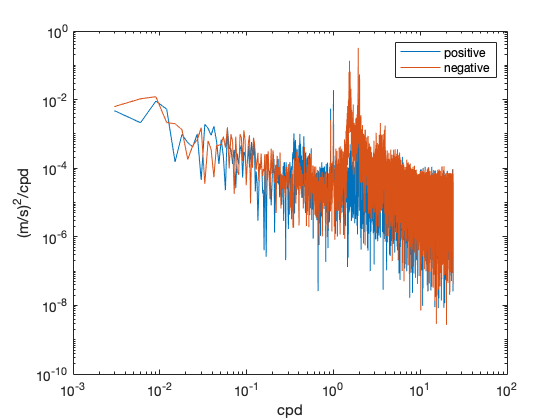

In [2]:
%Now we compute the rotary spectrum.
data=detrend(data);
a=fft(data); %Note we keep all the coefficients instead of throwing out half.
a=fftshift(a); %And now we use fftshift to rearrange them to have 0 frequency in the middle.
N=length(data);
amp=abs(a).^2; % for even N

%% which freqs do these correspond to?
T=dt*N;

df=1/T;
fn=1/2/dt;

%Now frequency goes from negative fn to positive fn:
f=-N/2*df:df:N/2*df-df;

amp = amp / N.^2; % first correct for the MATLAB normalization
%amp = amp .* 2; %Now we keep the whole spectrum so we do not multiply by 2.
amp = amp / df; % this is then the definition of the spectrum

variance=nanmean(abs(data).^2)
sum_spec=sum(amp)*df
sum_spec / variance
%Check!  It gives the variance.


figure(2)
loglog(f,amp,-f,amp)
legend('positive','negative')
ylabel('(m/s)^2/cpd')
xlabel('cpd')

As previously, we're getting somewhere, but we need to window our data to get better precision:

> In matlab.graphics.internal.ruler.rulerFunctions (line 116)
In ylim (line 37)
In freqline (line 13)


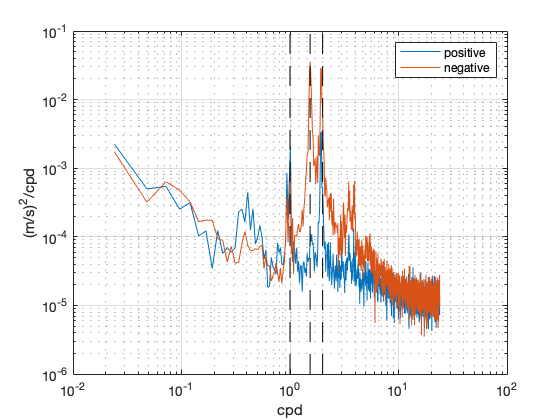

In [3]:
M=8; p=N/M;
    datab=reshape(data,N/M,M); % this gives us an array with N/M points
              % per column and M columns
    b=fft(datab);  % this computes the fft for each column
    b=fftshift(b);
    amp_b=abs(b).^2; 

%% Compute frequencies - note differences!

Tb=dt*p;

dfb=1/Tb;
fn=1/2/dt;

fb=0:dfb:fn; %frequency vector, cpd, goes from 0 to Nyquist.
fb=-p/2*dfb:dfb:p/2*dfb-dfb;

%% Normalize as above
amp_b = amp_b / p.^2; % first correct for the MATLAB normalization
amp_b = amp_b / dfb; % this is then the definition of the spectrum


loglog(fb,nanmean(amp_b,2),-fb,nanmean(amp_b,2))
freqline(2*sind(50));
freqline(2);
freqline(1);

grid
legend('positive','negative')
ylabel('(m/s)^2/cpd')
xlabel('cpd')

We can now see some interesting features. As expected, there are some big differences at $f$ between positive and negative frequencies - energy at $-f$ is over 100 times that at $+f$, implying nearly circularly polarized motion as expected.  

At the tidal peaks, we can see less of an imbalance - particularly at the diurnal frequencies where the CW and CCW energy is about equal.  As we implied above, that implies much more rectilinear motion as we expect for a back-and-forth tidal flow.     

At high frequency, we also see nearly equal energy.  As it turns out and as you'll learn when you cover internal waves in your waves class, internal waves have a "polarization relationship" that specifies that they should be nearly circular at $f,$ and rectilinear at high frequency, as observed.

#### More details on rotary coefficients

We can now see one way of understanding why real time series have mirrored positive and negative frequencies: a rectilinear motion (say $u=\cos(\omega t)$) can be represented as counterclockwise and clockwise motions of the same amplitude and phase.  In fact, there are interesting relationships between the rotary coefficients and the ellipse properties of the complex time series.

For the diurnal cycle, as for any wind frequency, I can write the wind as:
\begin{eqnarray}
u(t) & = & a_1 \cos(\omega t) + b_1\sin(\omega t)\\
v(t) & = & a_2 \cos(\omega t) + b_2 \sin(\omega t)
\end{eqnarray}
Or we can represent this as a complex number:
\begin{eqnarray}
U(t) & = & u(t) +iv(t) \\
& = & a_1 \cos(\omega t) + b_1\sin(\omega t) + a_2 \cos(\omega t) + b_2 \sin(\omega t) \\
& = & (a_1 + i a_2)\cos(\omega t) + (b_1 + i b_2)\sin(\omega t)
\end{eqnarray}
That gives us a vector motion in phase with the cosine and a vector motion
in phase with the sine.  But we're mixing complex amplitudes with real
trigonometric functions in this form.

A different way to think of this is as a rotational components in the
clockwise and counter-clockwise directions:
\begin{eqnarray}
U(t) & = & U^+ e^{i\omega t} + U^- e^{-i\omega t} \\
& = & U^+\left(\cos(\omega t) + i\sin(\omega t)\right) + 
  U^-\left(\cos(\omega t) - i\sin(\omega t)\right)  \\
& = & (U^++U^-)\cos(\omega t) + (U^+-U^-)i\sin(\omega t)
\end{eqnarray}
Here $e^{i\omega t}$ corresponds to counter-clockwise motion and
$e^{-i\omega t}$ corresponds to clockwise motion.
Since both expressions for U(t) have to be equivalent, this means that
\begin{eqnarray}
U^+ & = & \frac{a_1 + b_2 + i(a_2-b_1)}{2}\\
U^- & = & \frac{a_1 - b_2 + i(a_2+b_1)}{2}.
\end{eqnarray}
The magnitude of these terms will give the rotary spectral components.

We can think of these terms as defining an ellipse with major axis $|U^+| + |U^-|$
and minor axis $||U^+| - |U^-||$.  At each frequency, we can define three
additional parameters.  Two of these depend on angles, which we define as
\begin{eqnarray}
\epsilon^+ & = & \tan^{-1}\left(\frac{a_2-b_1}{a_1+b_2}\right)\\
\epsilon^- & = & \tan^{-1}\left(\frac{a_2+b_1}{a_1-b_2}\right)
\end{eqnarray}
Then the orientation of the ellipse is:
\begin{equation}
\theta = \frac{\epsilon^+ + \epsilon^-}{2},
\end{equation}
and the phase of the ellipse (corresponding to the time when the velocity
is at a maximum) is:
\begin{equation}
\phi = \frac{\epsilon^+ - \epsilon^-}{2},
\end{equation}
Finally, we can ask whether the motion is predominantly clockwise or counterclockwise by determining the sign of $|U^+| - |U^-|$.

While these parameters can be used to assess motions at a single frequency,
more broadly they can be extracted from the Fourier transform to tell us
about all frequencies.  To do this, we just have to remember that $a_1 + i b_1$ are the Fourier coefficients for $u$ and $a_2+i b_2$ represent the Fourier coefficients for $v$, so we can extract the values that we need.

If we separately Fourier transform $u$ and $v$,
then the clockwise spectrum is the positive frequencies for the Fourier transform of $u$ plus $i$ times the negative frequencies for the Fourier transform of $v$.  the counterclockwise spectrum is the opposite:  negative frequencies for the Fourier transform of $u$ plus $i$ times the positive frequencies for the Fourier tranform of $u$.

It's useful to consider some limiting cases.  Suppose that $v$ is zero and $u$ us proportional to $\cos(\omega t)$.  Then only $a_1$ is non-zero, so $U^+$ and
$U^-$ are both $a_1/2$, the major axis is $a_1$.  The angles $\epsilon^+$ and
$\epsilon^-$ are both 0, so the orientation angle $\theta=0$ and the time of
maximum $\phi=0$, consistent with cosine being a maximum when $t=0$.  You
can work through other cases to see how they express themselves in rotary form.

(For a
good discussion of this, check out course notes by Miles Sundermeyer (U.
Mass Dartmouth).)

**Covariance**

Early in the quarter we discussed the variance, and we left for later
the concept of correlation or covariance.  If we want to compare
two time series, we can compute the variance of one record relative to
the other.  Formally we can write:
\begin{equation}
\text{cov}({x,y}) = \langle x(t) y(t)\rangle.
\end{equation}
or in discrete terms
\begin{equation}
\text{cov}({x,y}) = \frac{1}{N}\sum_{i=1}^N x_i y_i.
\end{equation}
For comparison purposes, we often normalize this to produce a
correlation coefficient, which is normalized by the variance:
\begin{equation}
r = \frac{\frac{1}{N}\sum_{i=1}^N x_i y_i}{\sqrt{\frac{1}{N} \sum_{i=1}^N x_i^2
\frac{1}{N} \sum_{i=1}^N y_i^2}}.
\end{equation}
(You might wonder how to judge whether a correlation coefficient is
statistically significant.  Correlation coefficients should have a Gaussian
distribution, which means that cumulative distribution function will be
an error function.  We can use this to determine the correlation coefficient
that we might expect from an equivalent number of random white noise
variables:
\begin{equation}
\delta r = \text{erf}^{-1}(p) \sqrt{\frac{2}{N}}
\end{equation}
where $p$ is the significance level we want to consider, typically 0.95,
and $N$ is the effective number of degrees of freedom.)


**Coherence**

Coherence provides information that is analagous to a correlation
coefficient for Fourier transforms. It tells us whether two series 
are statistically
linked at any specific frequency.  This can be important if we think that
the records are noisy or otherwise uncorrelated at some frequencies, but
that they also contain statistically correlated signals.

To compute coherence, first we need a cross-spectrum.  (We looked 
at this in passing when we considered Parseval's theorem, but at that
stage, I quickly set my different variables equal to each other.)  Consider
two time series $x(t)$ and $y(t)$:
\begin{eqnarray}
x(t) & = & \sum_{n=-\infty}^{\infty} X_n e^{i2\pi f_n t} \\
y(t) & = & \sum_{n=-\infty}^{\infty} Y_n e^{i2\pi f_n t} 
\end{eqnarray}
The the cross spectrum is computed in analogy with the spectrum:
$$
\hat{S}_{XY}(f_m)= \frac{\langle X_m^* Y_m\rangle}{\Delta f}
$$

The relationship between the cross-spectrum and the covariance is analogous
to the relationship between the spectrum and the variance.  There are 
some important details to notice.  

1. The cross spectrum is complex, while the spectrum was real.
2. The cross spectrum is computed as an average of multiple spectral
segments.
3. In our discrete Fourier transform, we should be normalizing by $N$,
as always, but we're mostly concerned with relative values.


The cross-spectrum is complex, and when we use it we distinguish between
the real and imaginary parts.
The real part is called the "co-spectrum":
$$
C(f_m) = \Re{\hat{S}_{XY}(f_m)}
$$
and the imaginary part is called the "quadrature spectrum"

$$
Q(f_m) = \Im{\hat{S}_{XY}(f_m)}$$

To determine the frequency-space relationship between two data sets $x_n$ and
$y_n$, we first divide them into segments and Fourier transform them, so that
we have a set of $X_k$'s and a set of $Y_k$'s.  When we computed spectra,
we found the amplitude of each $X_k$ and then summed over all our segments.
Now we're going to do something slightly different.  For each segment pair,
we'll compute the product of $X$ times the complex conjugate of $Y$:
$X_k Y_k^*$.  Then we'll sum over all the segments.  In Matlab this becomes

In [ ]:
sum(X.*conj(Y),2)

The corresponding amplitude is $\sqrt{C^2(f_k) + Q^2(f_k)}$.
For comparison the spectrum for $X$ was:

$$
S_{xx}(f_k) = \frac{1}{N} \sum_{n=1}^N X_k X_k^*,
$$
which was always real.

The *coherence* resembles a correlation coefficient.  It's the amplitude squared
divided by the power spectral amplitudes for each of the two components:

$$
\gamma_{xy}^2(f_k) = \frac{C^2(f_k) + Q^2(f_k)}{S_{xx}(f_k) S_{yy}(f_k)}.
$$
(Sometimes you'll see $G_{xx}$, $G_{yy}$, and $G_{xy}$ in place of $S_{xx}$,
$S_{yy}$, and $S_{xy}$.  Bendat and Piersol define $S$ to represent the two 
sided cross-spectral density and $G$ to represent to represent one-sided spectra.)

In addition to the coherence amplitude, we can also infer a phase.
The phase $\phi(f_k) = \tan^{-1}(-Q(f_k)/C(f_k))$
tells us the timing difference between the two time series.  If $\phi = 0$,
changes in $x$ and $y$ happen at the same time.  If $\phi = \pi$, then
$x$ is at a peak when $y$ is at a trough.  And a value of $\phi=\pi/2$ or
$\phi=-\pi/2$ tells us that the records are a quarter cycle different.


**Digression:  Extracting phase information from the Fourier coefficients**

After all this effort to square Fourier coefficients, you might wonder
what the real and imaginary parts are really good for.  They are useful
for sorting out the phasing of your sinusoidal oscillations.  When is
the amplitude at a maximum?  To do this you can keep in mind that

$$
A\cos(\sigma t + \phi) = a\cos(\sigma t) + b\sin(\sigma t).
$$
This can be rewritten:

$$
\cos(\sigma t)\cos(\phi) - \sin(\sigma t)\sin(\phi) = \frac{a}{A}\cos(\sigma t) + \frac{b}{A}\sin(\sigma t),
$$
which means that
\begin{eqnarray}
\frac{a}{A} & = & \cos(\phi)\\
\frac{b}{A} & = & -\sin(\phi)
\end{eqnarray}
so
$$
\phi=\mbox{atan}\left(-\frac{b}{a}\right).
$$
Actually there's more information in the Fourier coefficients than this
conveys, since you know the signs of both $a$ and $b$, and not just their
relative magnitudes. The arctangent function doesn't distinguish +45$^o$
from -135$^o$, but we can.  In some numerical implementations, you can
address this using a function called atan2.

In [ ]:
phi = atan2(-b,a);

**Coherence:  Hypothetical Example for Mission Bay Channel**

The power of coherence comes because it gives us a means to compare two
different variables.  With spectra we can ask, is there energy at a given
frequency?  With coherence we can ask whether wind energy at a given
frequency drives an ocean response at a given frequency.  Does the ocean
respond to buoyancy forcing?  Does momentum vary with wind?  Does
one geographic location vary with another location?  Coherence is our
window into the underlying physics of the system.

Let's put this to work, starting with an idealized case:
Suppose we want to estimate currents entering and leaving the Mission
Bay Channel.  How do waves travel through the channel?  We can represent
this with a dispersion relationship describing the dominant propagation
in frequency-wavenumber space:  $k=K(f)$.

You could imagine measuring Mission Bay by installing one current meter
(with a cost of 10,000-20,000USD), but another approach is to install a couple
of pressure
recorders along the axis of the channel (at a cost of  1000 USD each).
Let's assume all waves come from the ocean, and travel along
the channel axis at speed $V=c+U_{current}$, where $c$ is the wave speed
and $U_{current}$ the background current speed.  If the waves are
surface gravity waves, $c=\sqrt{gD}$.  The sensors measure time series
of pressure only, so provide frequency information $f$.  How does
$f$ relate to velocity?  If we have a wavenumber $2\pi k=2\pi/\lambda$,
what does the pressure sensor see?  It will detect frequencies $f=kV =
k(c+U_{current})$.  So we can compute the cross spectrum between our
two records.


Let's test this out.  We'll define a hypothetical data set:

In [13]:
lambda=10; % 10 m wavelength
V=0.3; % 0.3 m/s propagation
n2s=0.2; % noise-to-signal ratio
time=(1:5000)';
x=n2s*randn(5000,1)+cos(2*pi/lambda*V*time);
y=n2s*randn(5000,1)+cos(2*pi/lambda*V*(time)+pi/2);

What happens if you Fourier transform without bothering to segment?
Then the data end up being unrevealing.
We can demonstrate this:

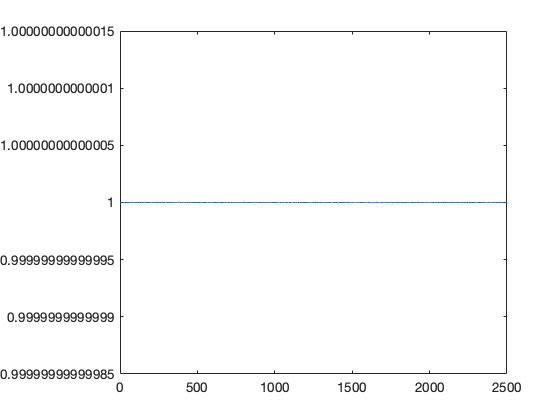

In [14]:
fx=fft(x);
fy=fft(y);
sx=abs(fx(1:end/2)).^2; sx(2:end)=2*sx(2:end);
sy=abs(fy(1:end/2)).^2; sy(2:end)=2*sy(2:end);
cxy=conj(fx(1:end/2)).*fy(1:end/2); cxy(2:end)=2*cxy(2:end);
C=abs(cxy)./sqrt(sx.*sy);
plot(C)

In this case, the coherence is 1 everywhere.  Why is that?
Because without averaging, we're merely computing:
\begin{eqnarray}
\gamma_{xy}^2 & = & \frac{(X^*Y)^* (X^*Y)}{X^*X Y^*Y}\\
       & = & \frac{XY^*X^*Y}{X^*X Y^*Y}\\
       & = & \frac{X^*X Y^*Y}{X^*X Y^*Y}\\
       & = & 1
\end{eqnarray}

When it's done properly,
coherence measures how well different segments of $x$ and $y$
show the same type of relationship at a given frequency.
We need the averaging to find out if the phase relationship between
$x$ and $y$ is repeatable.  With only one segment, both $x$ and $y$
are guaranteed to have information at each frequency with a definable
phase relationship between $x$ and $y$.  The multiple segments allow
us to test whether this phase relationship is relatively stable in
time:  does $x$ always lead $y$ by about the same fraction of a cycle?

To do the coherence calculation more constructively, we determine the frequency-space relationship between two data sets $x_n$ and
$y_n$, by first dividing them into segments and then Fourier transforming
them, so that
we have a set of $X_k$'s and a set of $Y_k$'s.  When we computed spectra,
we found the amplitude of each $X_k$ and then summed over all our segments.
Now we're going to do something slightly different.  For each segment pair,
we'll compute the product of $X$ times the complex conjugate of $Y$:
$X_k Y_k^*$.  Then we'll sum over all the segments.
In Matlab this becomes:

In [16]:
segment_length=500;
N=length(x);
M=segment_length/2; % define this value
Nseg=N/segment_length;
x_use=[reshape(x,segment_length,Nseg) ...
   reshape(x(M+1:end-M),segment_length,Nseg-1)];
y_use=[reshape(y,segment_length,Nseg) ...
  reshape(y(M+1:end-M),segment_length,Nseg-1)];
Nuse=size(x_use,2); % segment count, should be 2*Nseg-1
fx=fft(x_use); % should window and detrend here, but we're
               % skipping that for now
fy=fft(y_use);
sx=sum(abs(fx(1:M+1,:)).^2,2)/Nuse; % average over all spectra
                                 % (sum over 2nd index)
sx(2:end)=sx(2:end)*2;
sy=sum(abs(fy(1:M+1,:)).^2,2)/Nuse; % average over all spectra
                                 % (sum over 2nd index)
sy(2:end)=sy(2:end)*2;
cxy=sum(fx(1:M+1,:).*conj(fy(1:M+1,:)),2)/Nuse;
cxy(2:end)=cxy(2:end)*2;  % since we multiplied the spectra by 2,
                      % we also need to multiply the cospectrum by 2

nd=size(x_use,2);

From this we can compute the coherence and phase:

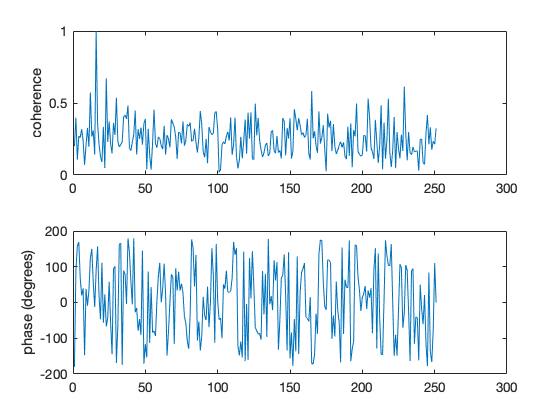

In [17]:
C=abs(cxy)./sqrt(sx.*sy);
phase_C = atan2(-imag(cxy),real(cxy));

subplot(211)
plot(C)
ylabel('coherence')
subplot(212)
plot(phase_C/pi*180)
ylabel('phase (degrees)')



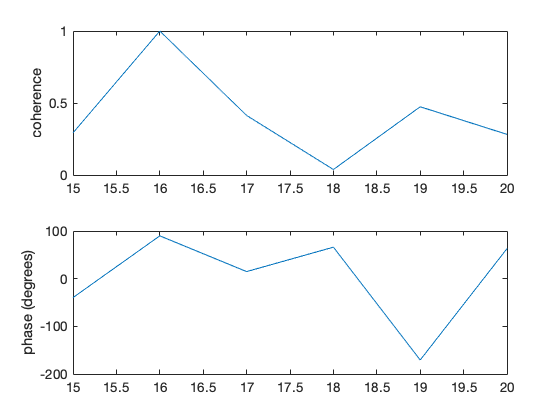

In [12]:
subplot(211)
plot(C)
xlim([15 20])
ylabel('coherence')

subplot(212)
plot(phase_C/pi*180)
xlim([15 20])
ylabel('phase (degrees)')


The phase difference that emerges from this is only relevant at the phase
where there is coherence energy (15 cycles/1000 points in the example above),
and in that case the phase is a quarter cycle different, with relatively
small error bars.  If we reverse the
order of $x$ and $y$, we'll find negative phase, so a lead will turn into a
lag.

The phase $\phi(f_k) = \tan^{-1}(-Q(f_k)/C(f_k))$
tells us the timing difference between the two time series.  If $\phi = 0$,
changes in $x$ and $y$ happen at the same time.  If $\phi = \pi$, then
$x$ is at a peak when $y$ is at a trough.  And a value of $\phi=\pi/2$ or
$\phi=-\pi/2$ tells us that the records are a quarter cycle different.